# Examples of data analysis

This notebook shows how to reuse metadata of image data example from the ABCE Open Data Project.

View the dataset here: 
    https://rpg.ifi.uzh.ch/datasets/davis/shapes_rotation.zip
    and
    https://github.com/building-energy/ABCE_Open_Data_Project/tree/main/external_datasets/Event_Camera_Dataset

View this notebook on GitHub here: https://github.com/building-energy/ABCE_Open_Data_Project/tree/main/external_datasets/Event_Camera_Dataset

## Setup

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import io

## Get metadata.json file from GitHub

The code below downloads this directly from GitHub repository. Then, set index and column name from metadata.

In [15]:
import urllib.request, json
import pprint


metadata_url = 'https://raw.githubusercontent.com/building-energy/ABCE_Open_Data_Project/main/external_datasets/Event_Camera_Dataset/dataset/metadata.json'
with urllib.request.urlopen(metadata_url) as url:
    metadata_dict = json.loads(url.read())
    pprint.pprint(metadata_dict)

{'@context': ['http://www.w3.org/ns/csvw', {'@language': 'en'}],
 'dc:datasetcreator': 'E. Mueggler, H. Rebecq, G. Gallego, T. Delbruck, D. '
                      'Scaramuzza',
 'dc:description': 'dataset introduction webpage: '
                   'https://rpg.ifi.uzh.ch/davis_data.html, download link: '
                   'https://rpg.ifi.uzh.ch/datasets/davis/shapes_rotation.zip',
 'dc:jsoncreator': 'ABCE Open Research Team, Loughborough University',
 'dc:title': 'shapes_rotation',
 'tables': [{'dc:description': 'Camera parameters',
             'dc:title': 'calib',
             'tableSchema': {'columns': [{'dc:datatype': 'float',
                                          'dc:description': '',
                                          'titles': ' fx'},
                                         {'dc:datatype': 'float',
                                          'dc:description': '',
                                          'titles': 'fy'},
                                         {'dc

## Get information of columns from metadata



In [16]:
columns = {}

for j, csv in enumerate(metadata_dict['tables']):
    table_name = csv.get('url')
    table = csv.get('tableSchema')
    titles =[]
    for column in table['columns']:
        title = column.get('titles')
        titles.append(title)
    columns[table_name]=titles

    print(table_name)
    print(columns[table_name])

calib.csv
[' fx', 'fy', 'cx', 'cy', 'k1', 'k1', 'k2', 'p1', 'p2', 'k3']
events.csv
['timestamp', 'x', 'y', 'polarity']
groundtruth.csv
['timestamp', 'px', 'py', 'pz', 'qx', 'qy', 'qz', 'qw']
images.csv
['timestamp', 'filename']
imu.csv
['timestamp', 'ax', 'ay', 'az', 'gx', 'gy', 'gz']


## Get datasets from research group webpage or GitHub

This downloads the dataset file directly from the original webpage (zipfile) or GitHub (csv).  

In [36]:
import urllib.request
import zipfile

resourseCode = '0'  # '0': original webpage; '1': GitHub
if resourseCode == '0':
    # from original webpage
    url='https://rpg.ifi.uzh.ch/datasets/davis/shapes_rotation.zip'  # zip download url address
    filename = 'shapes_rotation.zip'
    urllib.request.urlretrieve(url, filename)
    
    with zipfile.ZipFile(filename) as myzip:
        myzip_info = myzip.namelist()
        print(myzip_info[:10])
        with myzip.open('images.txt') as imagesfile: # can be replaced by information from metadata.json
            df_data_images = pd.read_csv(imagesfile, sep=' ', header=None, 
                                         names=('timestamp', 'filename'))
            # colomn name can be set by metadata.json
            print('images.txt')
            print(df_data_images[:3])
            imagesfile.close()
        with myzip.open('events.txt') as eventsfile: # can be replaced by information from metadata.json
            df_data_events = pd.read_csv(eventsfile, sep=' ', header=None,
                                         names=('timestamp','x','y','polarity'))
            # colomn name can be set by metadata.json
            print('events.txt')
            print(df_data_events[:3])
            eventsfile.close()
        with myzip.open('imu.txt') as imufile: # can be replaced by information from metadata.json
            df_data_imu = pd.read_csv(imufile, sep=' ', header=None,
                                     names=('timestamp','ax','ay','az','gx','gy','gz'))
            # colomn name can be set by metadata.json
            print('imu.txt')
            print(df_data_imu[:3])
            imufile.close()
        with myzip.open('groundtruth.txt') as groundtruth: # can be replaced by information from metadata.json
            df_data_groundtruth = pd.read_csv(groundtruth, sep=' ', header=None,
                                     names=('timestamp','px','py','pz','qx','qy','qz','qw'))
            # colomn name can be set by metadata.json
            print('groundtruth.txt')
            print(df_data_groundtruth[:3])
            groundtruth.close()
        with myzip.open('calib.txt') as calib: # can be replaced by information from metadata.json
            df_data_calib = pd.read_csv(calib, sep=' ', header=None,
                                     names=('fx','fy','cx','cy','k1','k2','p1','p2','k3'))
            # colomn name can be set by metadata.json
            print('calib.txt')
            print(df_data_calib[:3])
            calib.close()

elif resourseCode == '1':
    # from GitHub
    url=''  # to be updated
    df_data = pd.read_csv(url)
    # df_data.columns = df_data.columns.str.replace(' ','')




['images.txt', 'events.txt', 'groundtruth.txt', 'calib.txt', 'imu.txt', 'images/', 'images/frame_00000305.png', 'images/frame_00000697.png', 'images/frame_00000463.png', 'images/frame_00000497.png']
images.txt
   timestamp                   filename
0   0.028046  images/frame_00000000.png
1   0.072111  images/frame_00000001.png
2   0.116176  images/frame_00000002.png
events.txt
   timestamp    x    y  polarity
0   0.000000   33   39         1
1   0.000011  158  145         1
2   0.000050   88  143         0
imu.txt
   timestamp        ax        ay        az        gx        gy        gz
0   0.015972  0.426313 -9.934541 -0.134121  0.066046  0.042611 -0.026632
1   0.016974  0.421523 -9.934541 -0.143701  0.066046  0.044741 -0.025566
2   0.017975  0.431104 -9.987231 -0.114961  0.066046  0.045806 -0.025566
groundtruth.txt
   timestamp        px        py        pz        qx        qy        qz  \
0   0.021819  4.461423  1.551260  1.417544  0.520192 -0.496512  0.504802   
1   0.026819  4.461

## Show image samples

This is an example to show image samples for a quick review.

timestamp: 0.072111


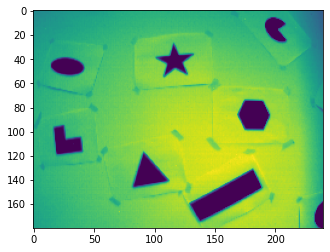

In [42]:
from PIL import Image
import matplotlib.pyplot as plt

if resourseCode == '0':
    imageNo = 1  # select image
    [timestamp, image_filename]=df_data_images.iloc[imageNo,:]
    imagePath = url+'/'+image_filename
    with zipfile.ZipFile(filename) as myzip:
        with myzip.open(image_filename) as imageSample: # can be replaced by information from metadata.json
            image = Image.open(imageSample)
            plt.imshow(image)
            print('timestamp:', timestamp)
            imageSample.close()

elif resourseCode == '1':
    fp = ' '   # to be updated

